In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


review_data = load_files(r"/content/drive/My Drive/AssignmentFolder/Assignment11/movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

#re : regular expression
#lematize : 근본적인 의미 (root meaning) - 형태소분석
#CountVectorizer : 워드의 vector화
#min : 빈도수 5개 이하 인거 제외 max : 70%이상의 빈도수로 출현한거 제외
#X : feature가 vector로 표현된것
#


#TfidTransformer : score구하는것

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#train_set : 1400
#test_set : 600

(1400, 1500)
(1400,)
(600, 1500)
(600,)


In [0]:
#save result
np.save('/content/drive/My Drive/AssignmentFolder/Assignment11/X_train', X_train)
np.save('/content/drive/My Drive/AssignmentFolder/Assignment11/X_test', X_test)
np.save('/content/drive/My Drive/AssignmentFolder/Assignment11/y_train', y_train)
np.save('/content/drive/My Drive/AssignmentFolder/Assignment11/y_test', y_test)

In [0]:
#load save result
X_train = np.load('/content/drive/My Drive/AssignmentFolder/Assignment11/X_train.npy')
X_test = np.load('/content/drive/My Drive/AssignmentFolder/Assignment11/X_test.npy')
y_train = np.load('/content/drive/My Drive/AssignmentFolder/Assignment11/y_train.npy')
y_test = np.load('/content/drive/My Drive/AssignmentFolder/Assignment11/y_test.npy')

In [0]:
np.random.seed(1020)

#np.random.randn : mean = 0, deriviation = 1인 random값
u = np.random.normal(loc = 0, scale = 0.3, size = (1501, 1001))
v = np.random.normal(loc = 0, scale = 0.3, size = (1001, 501))
w = np.random.normal(loc = 0, scale = 0.3, size = (501, 101))
q = np.random.normal(loc = 0, scale = 0.3, size = (101, 2))
#randn은 너무 범위가 넓어서 이번에는 사용이 어려움
#u = np.random.randn(1501, 1001)
#v = np.random.randn(1001, 501)
#w = np.random.randn(501, 101)
#q = np.random.randn(101, 2)


#train
#(1500, 1)
X = []
#(1000, 1)
Y = []
#(500, 1)
Z = []
#(100, 1)
H = []
#(2, 1)
T = []

#test
#(1500,1)
x = []
#(1000,1)
y = []
#(500,1)
z = []
#(100,1)
h = []
#(2,1)
t = []

#bias
bias = 1


In [8]:
!curl https://colab.chainer.org/install | sh -
#cupy library를 사용하기 위해 사용

import cupy as cp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   7821      0 --:--:-- --:--:-- --:--:--  7821
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 337.3MB 44kB/s 
+ set +ex
Installation succeeded!


In [9]:
#상수
iter = 0
#if learning rate is too small
#optimizing is not will be enough
learning_rate = 0.8
#lambda / 2n
lmbd = 0.00000000001

train_loss_list = []
test_loss_list = []

#accuracy
train_accuracy_list = []
test_accuracy_list = []
train_correct = 0
test_correct = 0

threshold = 0.0000001
#prediction
y_pred_train = np.zeros(len(X_train))
y_pred_test = np.zeros(len(X_test))

#to use convergence append 0
train_loss_list.append(0)

def sigmoid (z):
    return 1 / (1 + np.exp(-z))
 
def sig_der(z):
    return (z*(1-z))

while iter < 500:
  for i in range(0, 1400):
    #training input
    
    X = X_train[i]
    X = np.hstack([X, bias])
    Y = sigmoid(cp.dot(X, u))
    Z = sigmoid(cp.dot(Y, v))
    H = sigmoid(cp.dot(Z, w))
    T = sigmoid(cp.dot(H, q))

    R = np.zeros(2)
    R[y_train[i]] = 1.0
    #-값을 가지기도 해서 graph상에 표시할 때는 abs값 적용

    T_loss = T - R
    training_loss = np.abs(T_loss) + lmbd * (np.sum(u ** 2) + np.sum(v ** 2) + np.sum(w ** 2) + np.sum(q ** 2))
    #to use backpropagation
    #bias는 어차피 1이므로 신경쓰지 않아도 된다

    T_der = T_loss * sig_der(T)

    H_loss = cp.dot(T_der, q.T)
    H_der = H_loss * sig_der(H)

    Z_loss = cp.dot(H_der, w.T)
    Z_der = Z_loss * sig_der(Z)

    Y_loss = cp.dot(Z_der, v.T)
    Y_der = Y_loss * sig_der(Y)

    tmpq = q - learning_rate * (cp.reshape(H, (-1,1)) * T_der + lmbd * q) 
    tmpw = w - learning_rate * (cp.reshape(Z, (-1,1)) * H_der + lmbd * w)
    tmpv = v - learning_rate * (cp.reshape(Y, (-1,1)) * Z_der + lmbd * v)
    tmpu = u - learning_rate * (cp.reshape(X, (-1,1)) * Y_der + lmbd * u)
      
    q = tmpq
    w = tmpw
    v = tmpv
    u = tmpu

    if T.argmax(axis = 0) == y_train[i]:
      train_correct += 1
    y_pred_train[i] = T.argmax()
    
    #test
    if i < 600:
      x = X_test[i]
      x = np.hstack([x, bias])
      y = sigmoid(cp.dot(x, u))
      z = sigmoid(cp.dot(y, v))
      h = sigmoid(cp.dot(z, w))
      t = sigmoid(cp.dot(h, q))
        
      r = np.zeros(2)
      r[y_test[i]] = 1.0
      t_loss = t - r
      testing_loss = np.abs(t_loss) + lmbd * (np.sum(u ** 2) + np.sum(v ** 2) + np.sum(w ** 2) + np.sum(q ** 2))
      if t.argmax(axis = 0) == y_test[i]:    
        test_correct += 1
      y_pred_test[i] = t.argmax()

  #loss check
  #절댓값으로구해 음수일때 -로 가서 헷갈리는 그래프를 만들지 않도록 함
  train_loss_list.append(np.mean(np.abs(training_loss)))
  test_loss_list.append(np.mean(np.abs(testing_loss)))
  #accuracy check
  train_accuracy_list.append(train_correct / 1400)
  test_accuracy_list.append(test_correct / 600)

  print(iter)
  print("train loss : ", np.mean(training_loss), "train accuracy : ", train_correct / 1400)
  print("test loss : ", np.mean(testing_loss), "test accuracy : ", test_correct / 600)

  #converge check
  if abs(train_loss_list[iter] - train_loss_list[iter + 1]) < threshold:
    print("iter : ", iter)
    print("converge")
    break

  train_correct = 0
  test_correct = 0
  iter += 1

#delete 0
del train_loss_list[0]

0
train loss :  0.2949999019003847 train accuracy :  0.5042857142857143
test loss :  0.19613841662578724 test accuracy :  0.5233333333333333
1
train loss :  0.4910972849349642 train accuracy :  0.49214285714285716
test loss :  0.35242843073921126 test accuracy :  0.535
2
train loss :  0.48734248806506664 train accuracy :  0.5178571428571429
test loss :  0.49158206322964515 test accuracy :  0.545
3
train loss :  0.48239554246394994 train accuracy :  0.5292857142857142
test loss :  0.49041212187252203 test accuracy :  0.5566666666666666
4
train loss :  0.47731873625195964 train accuracy :  0.54
test loss :  0.48600521020305265 test accuracy :  0.57
5
train loss :  0.41292422841235255 train accuracy :  0.5328571428571428
test loss :  0.4813323125941485 test accuracy :  0.56
6
train loss :  0.46086062619589985 train accuracy :  0.5514285714285714
test loss :  0.47248517186089356 test accuracy :  0.5733333333333334
7
train loss :  0.4558602598392627 train accuracy :  0.57
test loss :  0.465

In [0]:
import matplotlib.pyplot as plt

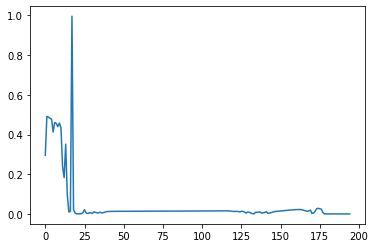

In [11]:
plt.plot(train_loss_list)
plt.show()

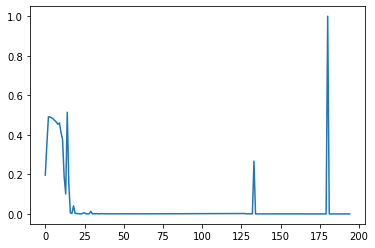

In [12]:
plt.plot(test_loss_list)
plt.show()

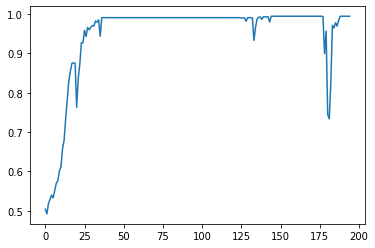

In [13]:
plt.plot(train_accuracy_list)
plt.show()

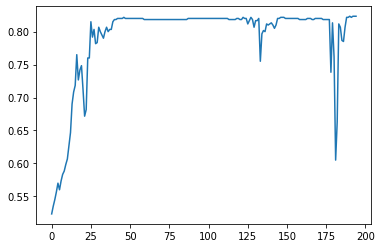

In [14]:
plt.plot(test_accuracy_list)
plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[693   5]
 [  3 699]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.99      1.00      0.99       702

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

0.9942857142857143
[[247  55]
 [ 51 247]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       302
           1       0.82      0.83      0.82       298

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

0.8233333333333334


#출력파트


#1. Plot the loss curve

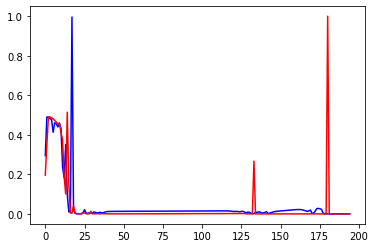

In [16]:
plt.plot(train_loss_list, color = 'b')
plt.plot(test_loss_list, color = 'r')
plt.show()

#2. Plot the accuracy curve

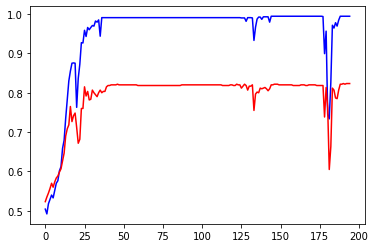

In [17]:
plt.plot(train_accuracy_list, color = 'b')
plt.plot(test_accuracy_list, color = 'r')
plt.show()

#3. Plot the quantitative results

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Training results")
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))
print()
print("Testing results")
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))

Training results
[[693   5]
 [  3 699]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.99      1.00      0.99       702

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

0.9942857142857143

Testing results
[[247  55]
 [ 51 247]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       302
           1       0.82      0.83      0.82       298

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

0.8233333333333334


array([0.99756288, 0.00277262])